In [143]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

df = pd.read_csv("logs-csv/RoboCIn_2-vs-Razi2018_3.csv")
df_play_on = df[ df['playmode'] == "play_on" ]
print(df['playmode'].unique())

['kick_off_l' 'play_on' 'foul_charge_r' 'free_kick_l' 'kick_in_l' 'goal_l'
 'kick_off_r' 'foul_charge_l' 'free_kick_r' 'corner_kick_l' 'kick_in_r'
 'corner_kick_r' 'goal_r' 'offside_l' 'goal_kick_r' 'time_over']


In [27]:
team_l = df['team_name_l'][0]
if(team_l == 'RoboCIn'): rcSide = 'left'
else: rcSide = 'right'

In [148]:
ball_x = df_play_on['ball_x']
ball_y = df_play_on['ball_y']
ball_vx = df_play_on['ball_vx']
ball_vy = df_play_on['ball_vy']

ball_vx.head()

len(df_play_on['show_time'])

3678

3678


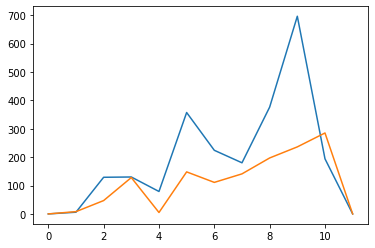

Posse r: 64.46%
Posse l: 35.54%


In [152]:
players_l_x = df_play_on[['player_l1_x', 'player_l2_x', 'player_l3_x', 'player_l4_x', 'player_l5_x', 'player_l6_x', 'player_l7_x', 'player_l8_x', 'player_l9_x', 'player_l10_x', 'player_l11_x']]
players_l_y = df_play_on[['player_l1_y', 'player_l2_y', 'player_l3_y', 'player_l4_y', 'player_l5_y', 'player_l6_y', 'player_l7_y', 'player_l8_y', 'player_l9_y', 'player_l10_y', 'player_l11_y']]
players_r_x = df_play_on[['player_r1_x', 'player_r2_x', 'player_r3_x', 'player_r4_x', 'player_r5_x', 'player_r6_x', 'player_r7_x', 'player_r8_x', 'player_r9_x', 'player_r10_x', 'player_r11_x']]
players_r_y = df_play_on[['player_r1_y', 'player_r2_y', 'player_r3_y', 'player_r4_y', 'player_r5_y', 'player_r6_y', 'player_r7_y', 'player_r8_y', 'player_r9_y', 'player_r10_y', 'player_r11_y']]
players_l_vx = df_play_on[['player_l1_vx', 'player_l2_vx', 'player_l3_vx', 'player_l4_vx', 'player_l5_vx', 'player_l6_vx', 'player_l7_vx', 'player_l8_vx', 'player_l9_vx', 'player_l10_vx', 'player_l11_vx']]
players_l_vy = df_play_on[['player_l1_vy', 'player_l2_vy', 'player_l3_vy', 'player_l4_vy', 'player_l5_vy', 'player_l6_vy', 'player_l7_vy', 'player_l8_vy', 'player_l9_vy', 'player_l10_vy', 'player_l11_vy']]
players_r_vx = df_play_on[['player_r1_vx', 'player_r2_vx', 'player_r3_vx', 'player_r4_vx', 'player_r5_vx', 'player_r6_vx', 'player_r7_vx', 'player_r8_vx', 'player_r9_vx', 'player_r10_vx', 'player_r11_vx']]
players_r_vy = df_play_on[['player_r1_vy', 'player_r2_vy', 'player_r3_vy', 'player_r4_vy', 'player_r5_vy', 'player_r6_vy', 'player_r7_vy', 'player_r8_vy', 'player_r9_vy', 'player_r10_vy', 'player_r11_vy']]

posse_r = 0
posse_l = 0
posse_pass = 0

plx = players_l_x.columns
ply = players_l_y.columns
prx = players_r_x.columns
pry = players_r_y.columns
vlx = players_l_vx.columns
vly = players_l_vy.columns
vrx = players_r_vx.columns
vry = players_r_vy.columns

holder = ('', 0)
player_l = 0
player_r = 0
holders_r = [0]*12
holders_l = [0]*12
for time in range (0,len(df_play_on['show_time'])):
    min_dist_l = 10000
    min_dist_r = 10000
    ball_v = math.sqrt( pow(ball_vx.values[time], 2) + pow(ball_vy.values[time], 2) )
    for c in range (0,10):
        dl = pow( (ball_x.values[time] - players_l_x[ plx[c] ].values[time]), 2 ) + pow( (ball_y.values[time] - players_l_y[ ply[c] ].values[time]), 2 )
        dist_l = math.sqrt(dl)
        if(dist_l < min_dist_l):
            player_l = c
            min_dist_l = dist_l
            vl_relative = math.sqrt(pow( (ball_vx.values[time] - players_l_vx[ vlx[c] ].values[time]), 2 ) + pow( (ball_vy.values[time] - players_l_vy[ vly[c] ].values[time]), 2 ))
                
        dr = pow( (ball_x.values[time] - players_r_x[ prx[c] ].values[time]), 2 ) + pow( (ball_y.values[time] - players_r_y[ pry[c] ].values[time]), 2 )
        dist_r = math.sqrt(dr)
        if(dist_r < min_dist_r):
            player_r = c
            min_dist_r = dist_r
            vr_relative = math.sqrt(pow( (ball_vx.values[time] - players_r_vx[ vrx[c] ].values[time]), 2 ) + pow( (ball_vy.values[time] - players_r_vy[ vry[c] ].values[time]), 2 ))
    
    d_abs = abs(min_dist_l - min_dist_r)
    
    if(holder == ('', 0)):
        if(min_dist_l < min_dist_r):
            posse_l = posse_l + 1
            holder = ('l', player_l)
        else:
            posse_r = posse_r + 1
            holder = ('r', player_r)
            
    elif(holder[0] == 'l'):
        #intercept
        if( (min_dist_r < min_dist_l) and (min_dist_r < 0.3) ):
            posse_r = posse_r + 1
            holder = ('r', player_r)
            holders_r[player_r+1] = holders_r[player_r+1] + 1
        #roubo de bola
        elif( (d_abs < 1.0) and (min_dist_r/vr_relative) < 1.0 ):
            posse_r = posse_r + 1
            holder = ('r', player_r)
            holders_r[player_r+1] = holders_r[player_r+1] + 1
        else:
            if(player_l != holder[1]):
                holder = ('l', player_l)
            posse_l = posse_l + 1
            holders_l[player_l+1] = holders_l[player_l+1] + 1
            
    elif(holder[0] == 'r'):
        #intercept
        if( (min_dist_l < min_dist_r) and (min_dist_l < 0.3) ):
            posse_l = posse_l + 1
            holder = ('l', player_l)
            holders_l[player_l+1] = holders_l[player_l+1] + 1
        #roubo de bola
        elif( (d_abs < 1.0) and (min_dist_l/vl_relative) < 1.0 ):
            posse_l = posse_l + 1
            holder = ('l', player_l)
            holders_l[player_l+1] = holders_l[player_l+1] + 1
        else:
            if(player_r != holder[1]):
                holder = ('r', player_r)
            posse_r = posse_r + 1
            holders_r[player_r+1] = holders_r[player_r+1] + 1
            
plt.plot(holders_r)
plt.plot(holders_l)
plt.show()
print("Posse r: %.2f" % (posse_r/len(df_play_on['show_time'])*100) + "%")
print("Posse l: %.2f" % (posse_l/len(df_play_on['show_time'])*100) + "%")
    
            